In [3]:
import pickle
from pathlib import Path

import pandas as pd
import numpy as np
from pulearn.elkanoto import ElkanotoPuClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.decomposition import PCA

from tqdm import tqdm
import pul_config
import importlib

importlib.reload(pul_config)

import utils

importlib.reload(utils)
from utils import (
    build_proba_df_obl,
    calc_predictions,
    build_proba_df,
    build_ranked_lists,
    calc_scores,
    load_grid_searches,
    score_df_from_grid_searches,
    train,
    evaluate,
)

# CHANGE HERE
input_dirs = [
    Path("1_outputs/standard/"),
    Path("1_outputs/small_DS/"),
    Path("1_outputs/large/"),
    Path("1_outputs/large_small_DS/"),
]
output_dirs = [
    Path("2_outputs/standard/"),
    Path("2_outputs/small_DS/"),
    Path("2_outputs/large/"),
    Path("2_outputs/large_small_DS/"),
]
method = "elkanoto"
pul_cfg = pul_config.ElkanotoConfig

remote_method = "Elkanoto"  # name of the output in S3
# -----

local_method = method
# MODEL_NAMES = ('RotatE', 'TransE', )
MODEL_NAMES = ("RotatE", "TransE", "CompGCN")
output_dirs = [output_dir / method for output_dir in output_dirs]

## Training

In [4]:
N_JOBS = 40
CV = 5
rerun = False

for input_dir, output_dir in tqdm(zip(input_dirs, output_dirs), total=len(input_dirs)):
    train(
        input_dir=input_dir,
        output_dir=output_dir,
        model_names=MODEL_NAMES,
        cv=CV,
        n_jobs=N_JOBS,
        pul_cfg=pul_cfg,
        rerun=rerun,
    )

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 180.56it/s]


2_outputs/standard/elkanoto/RotatE/RotatE_0.pkl exists. Skipping...
2_outputs/standard/elkanoto/RotatE/RotatE_1.pkl exists. Skipping...
2_outputs/standard/elkanoto/RotatE/RotatE_2.pkl exists. Skipping...
2_outputs/standard/elkanoto/RotatE/RotatE_3.pkl exists. Skipping...
2_outputs/standard/elkanoto/RotatE/RotatE_4.pkl exists. Skipping...
2_outputs/standard/elkanoto/RotatE/RotatE_5.pkl exists. Skipping...
2_outputs/standard/elkanoto/RotatE/RotatE_6.pkl exists. Skipping...
2_outputs/standard/elkanoto/RotatE/RotatE_7.pkl exists. Skipping...
2_outputs/standard/elkanoto/RotatE/RotatE_8.pkl exists. Skipping...
2_outputs/standard/elkanoto/RotatE/RotatE_9.pkl exists. Skipping...




100%|██████████| 10/10 [00:00<00:00, 203.52it/s]

 67%|██████▋   | 2/3 [00:00<00:00, 14.65it/s]

2_outputs/standard/elkanoto/TransE/TransE_0.pkl exists. Skipping...
2_outputs/standard/elkanoto/TransE/TransE_1.pkl exists. Skipping...
2_outputs/standard/elkanoto/TransE/TransE_2.pkl exists. Skipping...
2_outputs/standard/elkanoto/TransE/TransE_3.pkl exists. Skipping...
2_outputs/standard/elkanoto/TransE/TransE_4.pkl exists. Skipping...
2_outputs/standard/elkanoto/TransE/TransE_5.pkl exists. Skipping...
2_outputs/standard/elkanoto/TransE/TransE_6.pkl exists. Skipping...
2_outputs/standard/elkanoto/TransE/TransE_7.pkl exists. Skipping...
2_outputs/standard/elkanoto/TransE/TransE_8.pkl exists. Skipping...
2_outputs/standard/elkanoto/TransE/TransE_9.pkl exists. Skipping...




 67%|██████▋   | 2/3 [00:18<00:00, 14.65it/s]

 10%|█         | 1/10 [01:02<09:25, 62.81s/it]

 20%|██        | 2/10 [02:16<09:13, 69.19s/it]

 30%|███       | 3/10 [03:31<08:21, 71.71s/it]

 40%|████      | 4/10 [04:37<06:57, 69.66s/it]

 50%|█████     | 5/10 [05:51<05:55, 71.19s/it]

 60%|██████    | 6/10 [07:00<04:42, 70.53s/it]

 70%|███████   | 7/10 [07:58<03:18, 66.30s/it]

 80%|████████  | 8/10 [08:58<02:08, 64.43s/it]

 90%|█████████ | 9/10 [09:54<01:01, 61.63s/it]

100%|██████████| 10/10 [10:55<00:00, 65.57s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 61.90it/s][A

 33%|███▎      | 1/3 [00:00<00:00,  5.47it/s]

2_outputs/small_DS/elkanoto/RotatE/RotatE_0.pkl exists. Skipping...
2_outputs/small_DS/elkanoto/RotatE/RotatE_1.pkl exists. Skipping...
2_outputs/small_DS/elkanoto/RotatE/RotatE_2.pkl exists. Skipping...
2_outputs/small_DS/elkanoto/RotatE/RotatE_3.pkl exists. Skipping...
2_outputs/small_DS/elkanoto/RotatE/RotatE_4.pkl exists. Skipping...
2_outputs/small_DS/elkanoto/RotatE/RotatE_5.pkl exists. Skipping...
2_outputs/small_DS/elkanoto/RotatE/RotatE_6.pkl exists. Skipping...
2_outputs/small_DS/elkanoto/RotatE/RotatE_7.pkl exists. Skipping...
2_outputs/small_DS/elkanoto/RotatE/RotatE_8.pkl exists. Skipping...
2_outputs/small_DS/elkanoto/RotatE/RotatE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

2_outputs/small_DS/elkanoto/TransE/TransE_0.pkl exists. Skipping...
2_outputs/small_DS/elkanoto/TransE/TransE_1.pkl exists. Skipping...
2_outputs/small_DS/elkanoto/TransE/TransE_2.pkl exists. Skipping...




100%|██████████| 10/10 [00:00<00:00, 67.93it/s][A

 67%|██████▋   | 2/3 [00:00<00:00,  5.99it/s]

2_outputs/small_DS/elkanoto/TransE/TransE_3.pkl exists. Skipping...
2_outputs/small_DS/elkanoto/TransE/TransE_4.pkl exists. Skipping...
2_outputs/small_DS/elkanoto/TransE/TransE_5.pkl exists. Skipping...
2_outputs/small_DS/elkanoto/TransE/TransE_6.pkl exists. Skipping...
2_outputs/small_DS/elkanoto/TransE/TransE_7.pkl exists. Skipping...
2_outputs/small_DS/elkanoto/TransE/TransE_8.pkl exists. Skipping...
2_outputs/small_DS/elkanoto/TransE/TransE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:16<02:25, 16.14s/it]

 20%|██        | 2/10 [00:34<02:20, 17.55s/it]

 30%|███       | 3/10 [00:51<02:00, 17.18s/it]

 40%|████      | 4/10 [01:09<01:45, 17.55s/it]

 50%|█████     | 5/10 [01:26<01:27, 17.47s/it]

 60%|██████    | 6/10 [01:44<01:09, 17.46s/it]

 70%|███████   | 7/10 [02:02<00:52, 17.54s/it]

 80%|████████  | 8/10 [02:20<00:35, 17.80s/it]

 90%|█████████ | 9/10 [02:37<00:17, 17.63s/it]

100%|██████████| 10/10 [02:54<00:00, 17.47s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 65.87it/s][A

 33%|███▎      | 1/3 [00:00<00:00,  5.85it/s]

2_outputs/large/elkanoto/RotatE/RotatE_0.pkl exists. Skipping...
2_outputs/large/elkanoto/RotatE/RotatE_1.pkl exists. Skipping...
2_outputs/large/elkanoto/RotatE/RotatE_2.pkl exists. Skipping...
2_outputs/large/elkanoto/RotatE/RotatE_3.pkl exists. Skipping...
2_outputs/large/elkanoto/RotatE/RotatE_4.pkl exists. Skipping...
2_outputs/large/elkanoto/RotatE/RotatE_5.pkl exists. Skipping...
2_outputs/large/elkanoto/RotatE/RotatE_6.pkl exists. Skipping...
2_outputs/large/elkanoto/RotatE/RotatE_7.pkl exists. Skipping...
2_outputs/large/elkanoto/RotatE/RotatE_8.pkl exists. Skipping...
2_outputs/large/elkanoto/RotatE/RotatE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

2_outputs/large/elkanoto/TransE/TransE_0.pkl exists. Skipping...
2_outputs/large/elkanoto/TransE/TransE_1.pkl exists. Skipping...
2_outputs/large/elkanoto/TransE/TransE_2.pkl exists. Skipping...




100%|██████████| 10/10 [00:00<00:00, 68.13it/s][A

 67%|██████▋   | 2/3 [00:00<00:00,  6.19it/s]

2_outputs/large/elkanoto/TransE/TransE_3.pkl exists. Skipping...
2_outputs/large/elkanoto/TransE/TransE_4.pkl exists. Skipping...
2_outputs/large/elkanoto/TransE/TransE_5.pkl exists. Skipping...
2_outputs/large/elkanoto/TransE/TransE_6.pkl exists. Skipping...
2_outputs/large/elkanoto/TransE/TransE_7.pkl exists. Skipping...
2_outputs/large/elkanoto/TransE/TransE_8.pkl exists. Skipping...
2_outputs/large/elkanoto/TransE/TransE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [01:02<09:25, 62.80s/it]

 20%|██        | 2/10 [01:59<07:52, 59.09s/it]

 30%|███       | 3/10 [02:54<06:39, 57.13s/it]

 40%|████      | 4/10 [03:53<05:47, 57.91s/it]

 50%|█████     | 5/10 [04:51<04:50, 58.09s/it]

 60%|██████    | 6/10 [05:51<03:54, 58.54s/it]

 70%|███████   | 7/10 [06:55<03:01, 60.35s/it]

 80%|████████  | 8/10 [07:51<01:57, 58.97s/it]

 90%|█████████ | 9/10 [08:57<01:01, 61.35s/it]

100%|██████████| 10/10 [09:54<00:00, 59.45s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 74.60it/s][A

 33%|███▎      | 1/3 [00:00<00:00,  6.62it/s]

2_outputs/large_small_DS/elkanoto/RotatE/RotatE_0.pkl exists. Skipping...
2_outputs/large_small_DS/elkanoto/RotatE/RotatE_1.pkl exists. Skipping...
2_outputs/large_small_DS/elkanoto/RotatE/RotatE_2.pkl exists. Skipping...
2_outputs/large_small_DS/elkanoto/RotatE/RotatE_3.pkl exists. Skipping...
2_outputs/large_small_DS/elkanoto/RotatE/RotatE_4.pkl exists. Skipping...
2_outputs/large_small_DS/elkanoto/RotatE/RotatE_5.pkl exists. Skipping...
2_outputs/large_small_DS/elkanoto/RotatE/RotatE_6.pkl exists. Skipping...
2_outputs/large_small_DS/elkanoto/RotatE/RotatE_7.pkl exists. Skipping...
2_outputs/large_small_DS/elkanoto/RotatE/RotatE_8.pkl exists. Skipping...
2_outputs/large_small_DS/elkanoto/RotatE/RotatE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

2_outputs/large_small_DS/elkanoto/TransE/TransE_0.pkl exists. Skipping...
2_outputs/large_small_DS/elkanoto/TransE/TransE_1.pkl exists. Skipping...
2_outputs/large_small_DS/elkanoto/TransE/TransE_2.pkl exists. Skipping...
2_outputs/large_small_DS/elkanoto/TransE/TransE_3.pkl exists. Skipping...




100%|██████████| 10/10 [00:00<00:00, 64.20it/s][A

 67%|██████▋   | 2/3 [00:00<00:00,  6.31it/s]

2_outputs/large_small_DS/elkanoto/TransE/TransE_4.pkl exists. Skipping...
2_outputs/large_small_DS/elkanoto/TransE/TransE_5.pkl exists. Skipping...
2_outputs/large_small_DS/elkanoto/TransE/TransE_6.pkl exists. Skipping...
2_outputs/large_small_DS/elkanoto/TransE/TransE_7.pkl exists. Skipping...
2_outputs/large_small_DS/elkanoto/TransE/TransE_8.pkl exists. Skipping...
2_outputs/large_small_DS/elkanoto/TransE/TransE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:17<02:33, 17.06s/it]

 20%|██        | 2/10 [00:34<02:18, 17.27s/it]

 30%|███       | 3/10 [00:52<02:04, 17.80s/it]

 40%|████      | 4/10 [01:10<01:47, 17.89s/it]

 50%|█████     | 5/10 [01:28<01:29, 17.89s/it]

 60%|██████    | 6/10 [01:46<01:11, 17.97s/it]

 70%|███████   | 7/10 [02:04<00:53, 17.89s/it]

 80%|████████  | 8/10 [02:22<00:35, 17.95s/it]

 90%|█████████ | 9/10 [02:41<00:18, 18.09s/it]

100%|██████████| 10/10 [02:58<00:00, 17.87s/it]

100%|██████████| 4/4 [26:45<00:00, 401.26s/it]


## Evaluation

In [5]:
grid_searches_list = [
    load_grid_searches(output_dir=o, model_names=MODEL_NAMES) for o in output_dirs
]

In [6]:
score_dfs = [
    score_df_from_grid_searches(gs, i) for gs, i in zip(grid_searches_list, input_dirs)
]
for output_dir, score_df in zip(output_dirs, score_dfs):
    score_df.to_csv(output_dir / "score_df.csv")

In [7]:
score_dfs[0].groupby("model_name").mean()

/tmp/ipykernel_52824/1470429527.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_dfs[0].groupby('model_name').mean()


,score10_val,score100_val,score10_test,score100_test,score10_all,score100_all,mr_all,mrr_all,amri_all,mr_test,mrr_test,amri_test,tp_test,fp_test,fn_test,tn_test,tp_all,fp_all,fn_all,tn_all
model_name,,,,,,,,,,,,,,,,,,,,
CompGCN,3.0,16.3,2.2,16.3,9.9,91.8,3702.211147,0.009875,0.621824,1332.0248,0.009873,0.317423,1538.9,2237.1,31.6,93.4,7612.4,11343.6,81.2,537.8
RotatE,7.0,45.4,9.4,46.7,10.0,90.9,2708.678837,0.010209,0.723339,853.2456,0.033142,0.562951,3703.7,72.3,73.7,51.3,18723.5,232.5,245.5,373.5
TransE,3.8,29.3,5.4,30.8,6.4,59.2,2590.224233,0.006623,0.735443,641.7936,0.020527,0.671388,2973.8,802.2,33.6,91.4,14889.1,4066.9,121.4,497.6


Text(0, 0.5, 'score')

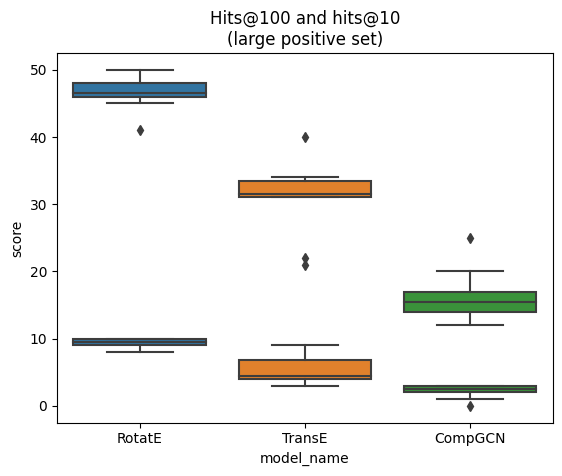

In [8]:
import seaborn as sns

sns.boxplot(score_dfs[0], x="model_name", y="score10_test").set(
    title="Hits@100 and hits@10\n(large positive set)"
)
sns.boxplot(score_dfs[0], x="model_name", y="score100_test").set_ylabel("score")

Text(0, 0.5, 'score')

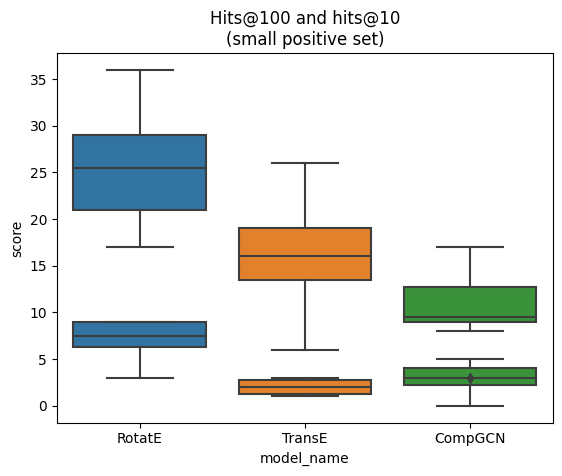

In [9]:
import seaborn as sns

sns.boxplot(score_dfs[1], x="model_name", y="score10_test").set(
    title="Hits@100 and hits@10\n(small positive set)"
)
sns.boxplot(score_dfs[1], x="model_name", y="score100_test").set_ylabel("score")

Text(0, 0.5, 'score')

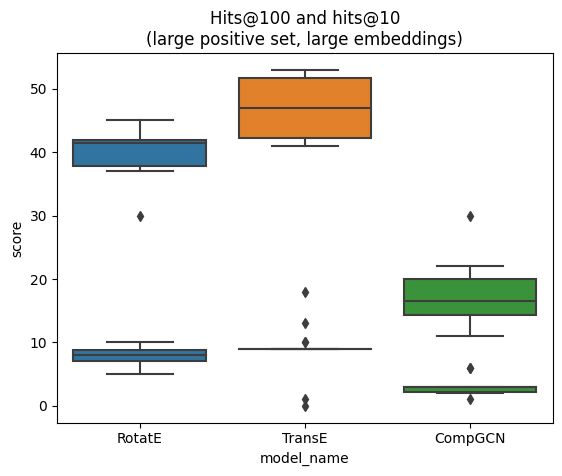

In [10]:
import seaborn as sns

sns.boxplot(score_dfs[2], x="model_name", y="score10_test").set(
    title="Hits@100 and hits@10\n(large positive set, large embeddings)"
)
sns.boxplot(score_dfs[2], x="model_name", y="score100_test").set_ylabel("score")

Text(0, 0.5, 'score')

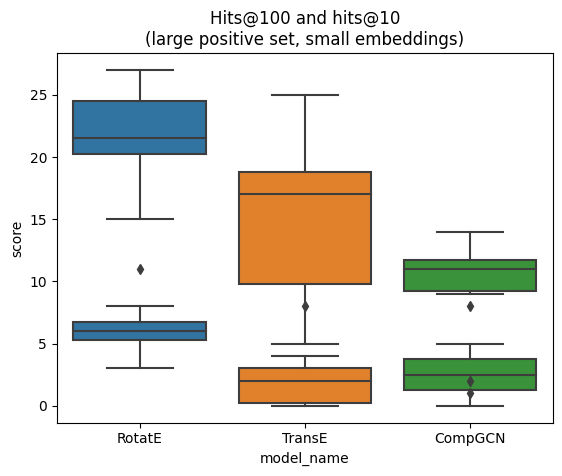

In [11]:
import seaborn as sns

sns.boxplot(score_dfs[3], x="model_name", y="score10_test").set(
    title="Hits@100 and hits@10\n(large positive set, small embeddings)"
)
sns.boxplot(score_dfs[3], x="model_name", y="score100_test").set_ylabel("score")

In [12]:
score_dfs = []
for output_dir in output_dirs:
    score_dfs.append(pd.read_csv(output_dir / "score_df.csv", index_col=0))
plot_dfs = []
for ds, score_df in zip(
    ("large", "small", "large_embeddings", "large_embeddings_small"), score_dfs
):
    plot_df = score_df[["model_name", "score10_test", "score100_test"]].copy()
    plot_df.columns = ["model_name", "hits@10", "hits@100"]
    plot_df["dataset"] = ds
    plot_dfs.append(plot_df)

plot_df = pd.concat(plot_dfs)
plot_df = plot_df.melt(id_vars=["model_name", "dataset"])
plot_dfs = {k: v for k, v in plot_df.groupby("model_name")}

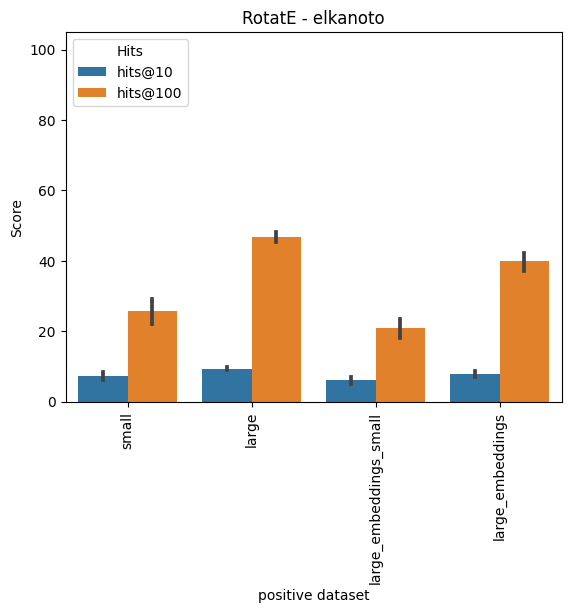

In [13]:
y_lim = (0, 105)
y_label = "Score"

import seaborn as sns
import matplotlib.pyplot as plt

model_name = "RotatE"
plot_df = plot_dfs[model_name]

plot_df["Hits"] = plot_df["variable"]
plot = sns.barplot(
    plot_df,
    x="dataset",
    y="value",
    hue="Hits",
    order=["small", "large", "large_embeddings_small", "large_embeddings"],
)
sns.move_legend(plot, "upper left")
plot.set(xlabel="positive dataset", ylabel=y_label)
plot.set_title(f"{model_name} - {method}")
plot.set_ylim(y_lim)
_ = plot.set_xticklabels(
    labels=["small", "large", "large_embeddings_small", "large_embeddings"], rotation=90
)

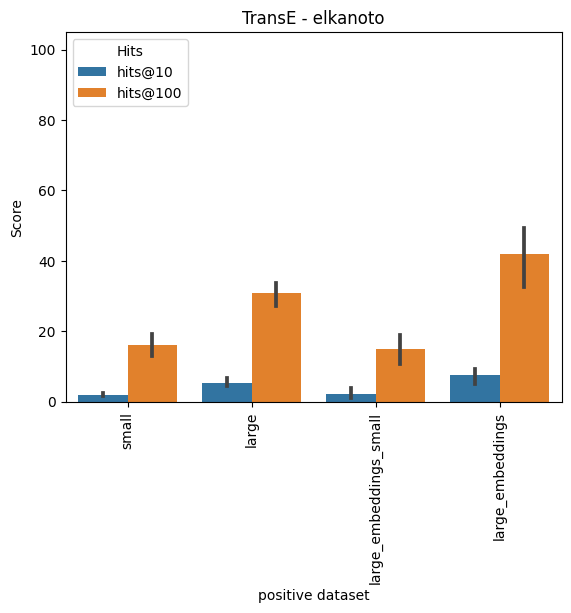

In [14]:
y_lim = (0, 105)
y_label = "Score"

import seaborn as sns
import matplotlib.pyplot as plt

model_name = "TransE"
plot_df = plot_dfs[model_name]

plot_df["Hits"] = plot_df["variable"]
plot = sns.barplot(
    plot_df,
    x="dataset",
    y="value",
    hue="Hits",
    order=["small", "large", "large_embeddings_small", "large_embeddings"],
)
sns.move_legend(plot, "upper left")
plot.set(xlabel="positive dataset", ylabel=y_label)
plot.set_title(f"{model_name} - {method}")
plot.set_ylim(y_lim)
_ = plot.set_xticklabels(
    labels=["small", "large", "large_embeddings_small", "large_embeddings"], rotation=90
)

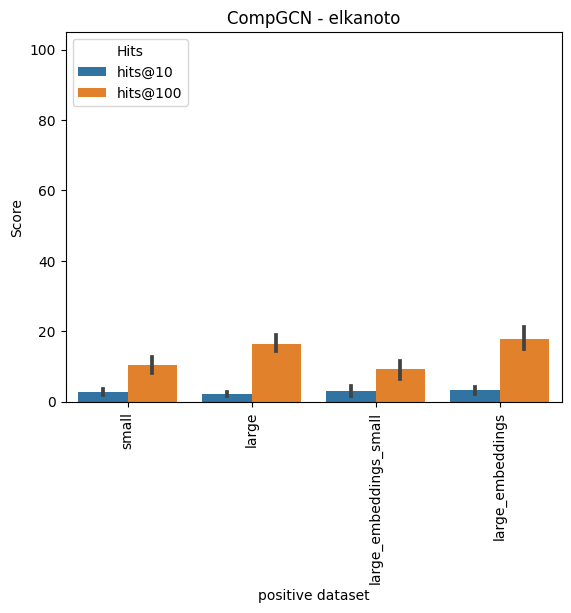

In [15]:
y_lim = (0, 105)
y_label = "Score"

import seaborn as sns
import matplotlib.pyplot as plt

model_name = "CompGCN"
plot_df = plot_dfs[model_name]

plot_df["Hits"] = plot_df["variable"]
plot = sns.barplot(
    plot_df,
    x="dataset",
    y="value",
    hue="Hits",
    order=["small", "large", "large_embeddings_small", "large_embeddings"],
)
sns.move_legend(plot, "upper left")
plot.set(xlabel="positive dataset", ylabel=y_label)
plot.set_title(f"{model_name} - {method}")
plot.set_ylim(y_lim)
_ = plot.set_xticklabels(
    labels=["small", "large", "large_embeddings_small", "large_embeddings"], rotation=90
)

In [16]:
proba_dfs = [
    build_proba_df_obl(
        gs, i, mns=MODEL_NAMES, gene_df_file="../topological_features/data/gene_df.csv"
    )
    for gs, i in zip(grid_searches_list, input_dirs)
]
for output_dir, proba_df in zip(output_dirs, proba_dfs):
    proba_df.to_csv(output_dir / "proba_df.csv")

In [21]:
proba_df = proba_dfs[0]
proba_df.query("test").sort_values("RotatE_0", ascending=False)

,node_id,gene_name,irr,train,val,test,RotatE_0,RotatE_1,RotatE_2,RotatE_3,...,CompGCN_0,CompGCN_1,CompGCN_2,CompGCN_3,CompGCN_4,CompGCN_5,CompGCN_6,CompGCN_7,CompGCN_8,CompGCN_9
82572,NCBIGENE:5595,MAPK3,True,False,False,True,6.339947,4.315380,7.512500,5.244624,...,1.558602,8.005209,8.481325,1.027418,0.882664,0.929420,1.245476,4.264669,1.403583,0.406036
78540,NCBIGENE:3717,JAK2,True,False,False,True,6.322309,4.708831,7.144436,4.888284,...,0.828817,0.823092,1.293500,0.967301,0.668128,1.427695,1.230388,1.164213,0.587091,0.369717
74105,NCBIGENE:1839,HBEGF,True,False,False,True,6.319503,0.396645,1.768819,1.305967,...,1.510444,1.417915,1.522356,0.195457,0.774751,1.571724,2.501496,0.349987,0.536902,0.611408
81237,NCBIGENE:5293,PIK3CD,True,False,False,True,6.319381,3.362660,2.580536,1.905475,...,0.688187,0.458155,2.290382,0.164269,0.749972,0.990632,1.787226,1.860729,1.249175,0.787781
84971,NCBIGENE:6774,STAT3,True,False,False,True,6.313977,3.393502,7.625242,4.935226,...,1.065026,2.624982,8.686264,10.214535,0.565987,0.625632,0.592749,1.552564,1.146194,0.378585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78486,NCBIGENE:3660,IRF2,False,False,False,True,0.019940,0.068522,0.028698,0.012358,...,0.789946,1.185847,0.794730,0.158508,0.567347,0.805295,0.165530,0.394318,0.470869,0.912541
89009,NCBIGENE:9411,ARHGAP29,False,False,False,True,0.019066,0.072521,0.138233,0.057557,...,0.550682,0.660314,0.307834,0.142763,2.539117,0.652848,0.141836,1.119183,0.870734,0.290440
85703,NCBIGENE:7529,YWHAB,False,False,False,True,0.017221,0.106074,0.335276,0.088094,...,1.218679,6.598491,1.011316,0.792304,0.494875,0.897069,0.492182,0.608608,0.789679,1.087136
77649,NCBIGENE:3092,HIP1,False,False,False,True,0.013836,0.052481,0.053324,0.116365,...,0.396012,0.175132,0.365619,0.255224,0.888431,0.616713,0.268486,0.615658,0.710786,0.461073


In [22]:
for proba_df, score_df, od in zip(proba_dfs, score_dfs, output_dirs):
    proba_df.to_csv(od / "proba_df.csv")
    proba_df.query("test").to_csv(od / "proba_df_test.csv")
    score_df.to_csv(od / "score_df.csv")

    for mn in MODEL_NAMES:
        score_cols = [c for c in proba_df.columns if c.startswith(f"{mn}_")]
        tmp_df = proba_df[
            ["node_id", "gene_name", "irr", "train", "val", "test", *score_cols]
        ]
        tmp_df.to_csv(od / f"proba_df_{mn}.csv")
        tmp_df_test = tmp_df.query("test")
        tmp_df_test.to_csv(od / f"proba_df_test_{mn}.csv")

        genes_100 = build_ranked_lists(tmp_df, prefix=mn)
        genes_100.to_csv(od / f"genes_100_{mn}.csv", index=False)
        genes_100_test = build_ranked_lists(tmp_df_test, prefix=mn)
        genes_100_test.to_csv(od / f"genes_100_test_{mn}.csv", index=False)

        ds = "test"
        score_df_tmp = score_df.query("model_name == @mn")
        score_df_tmp = pd.concat(
            [score_df_tmp["m_name"], score_df_tmp.filter(regex=f".*_{ds}", axis=1)],
            axis=1,
        ).set_index("m_name")
        score_df_tmp.columns = [
            c.replace(f"_{ds}", "").replace("score", "hits@")
            for c in score_df_tmp.columns
        ]
        score_df_tmp = score_df_tmp.T
        score_df_tmp["mean"] = score_df_tmp.mean(axis=1)
        score_df_tmp.to_csv(od / f"scores_{ds}_{mn}.csv", index_label="score")

        ds = "all"
        score_df_tmp = score_df.query("model_name == @mn")
        score_df_tmp = pd.concat(
            [score_df_tmp["m_name"], score_df_tmp.filter(regex=f".*_{ds}", axis=1)],
            axis=1,
        ).set_index("m_name")
        score_df_tmp.columns = [
            c.replace(f"_{ds}", "").replace("score", "hits@")
            for c in score_df_tmp.columns
        ]
        score_df_tmp = score_df_tmp.T
        score_df_tmp["mean"] = score_df_tmp.mean(axis=1)
        score_df_tmp.to_csv(od / f"scores_{mn}.csv", index_label="score")

In [23]:
s3_prefix = "s3://ENTER AWS S3 PREFIX/Result_lists"
for model_name in MODEL_NAMES:
    method_name = f"{remote_method}_{model_name}"

    graph = "OBL"
    ts = "LargeTS"
    subset = "WholeSet"
    !aws s3 cp './2_outputs/standard/{local_method}/proba_df_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/standard/{local_method}/genes_100_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/standard/{local_method}/scores_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv
    subset = "TestSet"
    !aws s3 cp './2_outputs/standard/{local_method}/proba_df_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/standard/{local_method}/genes_100_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/standard/{local_method}/scores_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv

    ts = "SmallTS"
    subset = "WholeSet"
    !aws s3 cp './2_outputs/small_DS/{local_method}/proba_df_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/small_DS/{local_method}/genes_100_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/small_DS/{local_method}/scores_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv
    subset = "TestSet"
    !aws s3 cp './2_outputs/small_DS/{local_method}/proba_df_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/small_DS/{local_method}/genes_100_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/small_DS/{local_method}/scores_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv

    # Embeddings based on large DS
    graph = "enrichedOBL"

    ts = "LargeTS"
    subset = "WholeSet"
    !aws s3 cp './2_outputs/large/{local_method}/proba_df_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/large/{local_method}/genes_100_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/large/{local_method}/scores_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv
    subset = "TestSet"
    !aws s3 cp './2_outputs/large/{local_method}/proba_df_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/large/{local_method}/genes_100_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/large/{local_method}/scores_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv

    ts = "SmallTS"
    subset = "WholeSet"
    !aws s3 cp './2_outputs/large_small_DS/{local_method}/proba_df_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/large_small_DS/{local_method}/genes_100_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/large_small_DS/{local_method}/scores_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv
    subset = "TestSet"
    !aws s3 cp './2_outputs/large_small_DS/{local_method}/proba_df_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/large_small_DS/{local_method}/genes_100_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/large_small_DS/{local_method}/scores_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv

upload: 2_outputs/standard/elkanoto/proba_df_RotatE.csv to s3://nnedl-core-prd-eu-central-1-curated/compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/OBL/LargeTS/Elkanoto_RotatE/WholeSet/all_results.csv
upload: 2_outputs/standard/elkanoto/genes_100_RotatE.csv to s3://nnedl-core-prd-eu-central-1-curated/compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/OBL/LargeTS/Elkanoto_RotatE/WholeSet/gene_100.csv
upload: 2_outputs/standard/elkanoto/scores_RotatE.csv to s3://nnedl-core-prd-eu-central-1-curated/compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/OBL/LargeTS/Elkanoto_RotatE/WholeSet/scores.csv
upload: 2_outputs/standard/elkanoto/proba_df_test_RotatE.csv to s3://nnedl-core-prd-eu-central-1-curated/compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/OBL/LargeTS/Elkanoto_RotatE/TestSet/all_results.csv
upload: 2_outputs/standard/elkanoto/genes_100_test_RotatE.csv to s3://nnedl-core-prd-eu-central-1-curated/compbiosandbox/Projects

In [24]:
!aws s3 ls --recursive {s3_prefix}

2023-07-07 16:05:55       6416 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/CompGCN/TestSet/gene_100.csv
2023-07-07 16:05:55       6399 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/CompGCN/WholeSet/gene_100.csv
2023-07-07 12:28:03     906682 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/Elkanoto_CompGCN/TestSet/all_results.csv
2023-07-07 12:28:05       6398 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/Elkanoto_CompGCN/TestSet/gene_100.csv
2023-07-07 12:28:05       1022 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/Elkanoto_CompGCN/TestSet/scores.csv
2023-07-07 12:28:00    4548866 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/Elkanoto_CompGCN/WholeSet/all_results.csv
2023-07-07 12:28:02       6248 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Het